In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Analyze Data**

In [2]:
df = pd.read_csv("Volumetric_features.csv")
df.head

<bound method NDFrame.head of       S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0        1                 22916.9              982.7   
1        2                 22953.2              984.5   
2        3                 23320.4             1062.1   
3        4                 24360.0             1000.5   
4        5                 25769.4             1124.4   
...    ...                     ...                ...   
4221  4222                 27065.6              532.4   
4222  4223                 28408.8              912.7   
4223  4224                 34467.9             1659.6   
4224  4225                 31627.5             1334.4   
4225  4226                 14879.4              704.2   

      Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                          15196.7                 55796.4         6855.5   
1                          15289.7                 55778.6         6835.1   
2                          15382.1                 555

**Preprocess Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Age'], axis=1).values
y = df['Age'].values
X_norm = MinMaxScaler().fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.3, random_state = 42)

**Model 1: CART Tree**

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred_t = dt.predict(X_train)
mse_dt = MSE(y_test, y_pred)
rmse = np.sqrt(mse_dt)
rmse_norm = rmse/(max(y_test)-min(y_test))
print('normalized rmse: ',rmse_norm)
print('training r2: ', r2_score(y_train,y_pred_t))
print('testing r2: ', r2_score(y_test,y_pred))

normalized rmse:  0.14130286279620527
training r2:  1.0
testing r2:  0.7117838303963409


Text(0.5, 1.0, 'Basic Tree Actual vs Predicted')

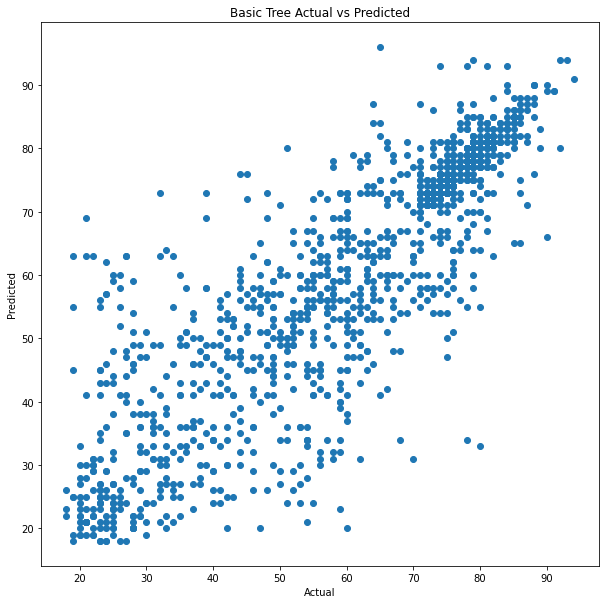

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Basic Tree Actual vs Predicted')

**Model 2: Mulitple Linear Regression (MLR)**

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
y_pred_t2 = lr.predict(X_train)
rmse_norm = np.sqrt(MSE(y_test,y_pred2))/(max(y_test)-min(y_test))
print('rmse: ',rmse_norm)
print('training r2: ', r2_score(y_train,y_pred_t2))
print('testing r2: ', r2_score(y_test,y_pred2))

rmse:  0.10227814933422497
training r2:  0.8644395898262808
testing r2:  0.8489981935502403


Text(0.5, 1.0, 'MLR Actual vs Predicted')

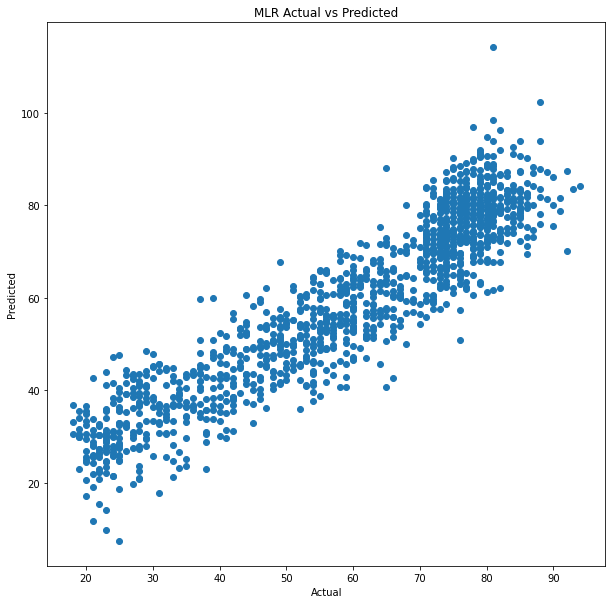

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLR Actual vs Predicted')

**Model 3: Neural Network**

In [9]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(5,),solver='sgd',random_state=1,).fit(X_train,y_train)
y_pred3 = reg.predict(X_test)
y_pred_t3 = reg.predict(X_train)
rmse_norm = np.sqrt(MSE(y_test,y_pred3))/(max(y_test)-min(y_test))
print('rmse: ',rmse_norm)
print('training r2: ', r2_score(y_train,y_pred_t3))
print('testing r2: ', r2_score(y_test,y_pred3))

rmse:  0.11154323688251501
training r2:  0.822757318189946
testing r2:  0.8204014165433913


Text(0.5, 1.0, 'NN Actual vs Predicted')

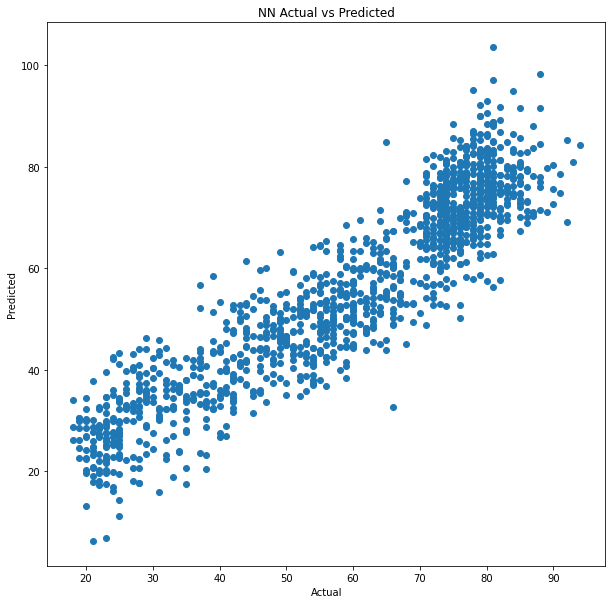

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('NN Actual vs Predicted')